In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test) =fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
import matplotlib.pyplot as plt

In [6]:
x_train.shape

(60000, 28, 28)

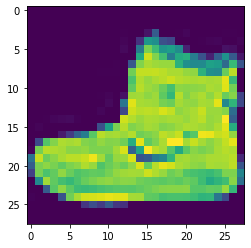

In [7]:
plt.imshow(x_train[0])

### Preprocessingthe Data

In [8]:
x_train.max()

255

In [9]:
x_train = x_train/255

In [10]:
x_test = x_test/255

In [11]:
x_train=x_train.reshape(60000,28,28,1)#adding color channel as it is black and white img

In [12]:
x_test=x_test.reshape(10000,28,28,1)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_cat_train=to_categorical(y_train,10)

In [15]:
y_cat_test =to_categorical(y_test,10)

### Building the Model

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [22]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the Model

In [24]:
model.fit(x_train,y_cat_train,validation_data=(x_test,y_cat_test),epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.3924 - accuracy: 0.8604 - val_loss: 0.3200 - val_accuracy: 0.8856
Epoch 2/3
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.2729 - accuracy: 0.9008 - val_loss: 0.2787 - val_accuracy: 0.8965
Epoch 3/3
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.2283 - accuracy: 0.9151 - val_loss: 0.2636 - val_accuracy: 0.9047


### evaluating model

In [26]:
model.metrics_names

['loss', 'accuracy']

In [27]:
import pandas as pd

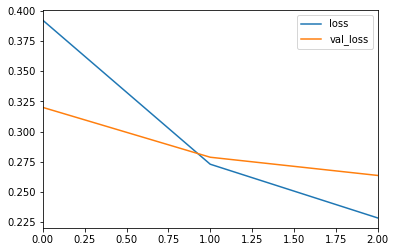

In [28]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

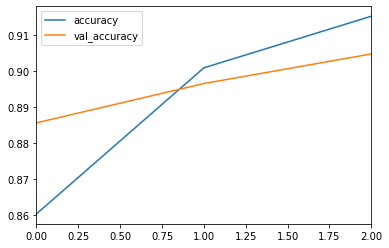

In [29]:
pd.DataFrame(model.history.history)[['accuracy','val_accuracy']].plot()

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
predictions= model.predict_classes(x_test)

In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.82      0.86      0.84      1000
           3       0.91      0.93      0.92      1000
           4       0.84      0.82      0.83      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.68      0.72      1000
           7       0.93      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [34]:
confusion_matrix(y_test,predictions)

array([[891,   0,  18,  11,   5,   1,  68,   0,   6,   0],
       [  1, 982,   1,  11,   1,   0,   3,   0,   1,   0],
       [ 14,   1, 865,  11,  49,   0,  60,   0,   0,   0],
       [ 11,   7,   9, 931,  27,   0,  15,   0,   0,   0],
       [  0,   1,  86,  34, 820,   0,  58,   0,   1,   0],
       [  0,   0,   0,   0,   0, 981,   0,  11,   0,   8],
       [144,   2,  76,  24,  70,   0, 677,   0,   7,   0],
       [  0,   0,   0,   0,   0,   8,   0, 982,   0,  10],
       [  3,   0,   3,   3,   3,   1,   2,   4, 981,   0],
       [  0,   0,   0,   0,   0,   7,   1,  55,   0, 937]])

In [35]:
import seaborn as sns

/root/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


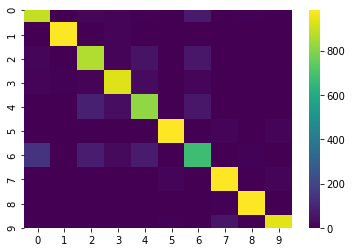

In [39]:
sns.heatmap(confusion_matrix(y_test,predictions),cmap='viridis')